In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.linalg import norm
import MDAnalysis.analysis.distances as d

In [5]:
#Using here GLUT3 simulations published in Qureshi et al. Nature (2020)
dir="glut3/"
protname="glut3_holo"

In [6]:
title_d = {159:'Q159-OH1', 280:'Q280-OH2', 281:'Q291-OH3', 286:'N286-OH3', 315:'N315-OH6'}
bfru_sel = {159:'and name O1 HO1', 280: 'and name O2 HO2', 281:'and name O3 HO3', 286:'and name O3 HO3',315:'and name O6 HO6'}
res_l = [159,280,281,286,315]
color_l = ['#666666','#FFDE5E', '#E6E6E6', '#80FFFF','darkseagreen']

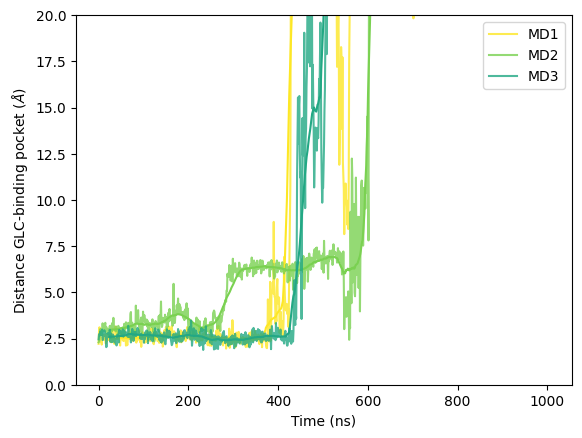

In [7]:
colors = plt.cm.viridis_r(np.linspace(0, 1, 6))
fig, ax1 = plt.subplots()

for i in range(1,4):
    u = mda.Universe(dir+protname+str(i)+".start.gro",\
                    dir+protname+str(i)+".skip250.xtc")
    binding_res = u.select_atoms(f'resid 159 280 281 286 315 386')
    bfru = u.select_atoms(f'resname BGLC')
    dists = []
    for ts in u.trajectory:
        temp = np.min(d.distance_array(binding_res.center_of_mass(), bfru.center_of_mass()))
        dists.append(temp)
    ax1.plot(np.linspace(0,np.shape(dists)[0],np.shape(dists)[0]),dists,color=colors[i-1], alpha=0.8, label='MD%s' %i)
    ax1.plot(np.linspace((50 - 1) / 2,1000,956),np.convolve(dists, np.ones(50)/50, mode='valid'), color=colors[i-1])
ax1.legend()
ax1.set_ylabel(f'Distance GLC-binding pocket ($\AA$)')

ax1.set_xlabel(f'Time (ns)')
ax1.set_ylim(0,20)
fig.savefig('figures/distGLC_bndpocket_GLUT3_replicas.png', bbox_inches='tight')
    

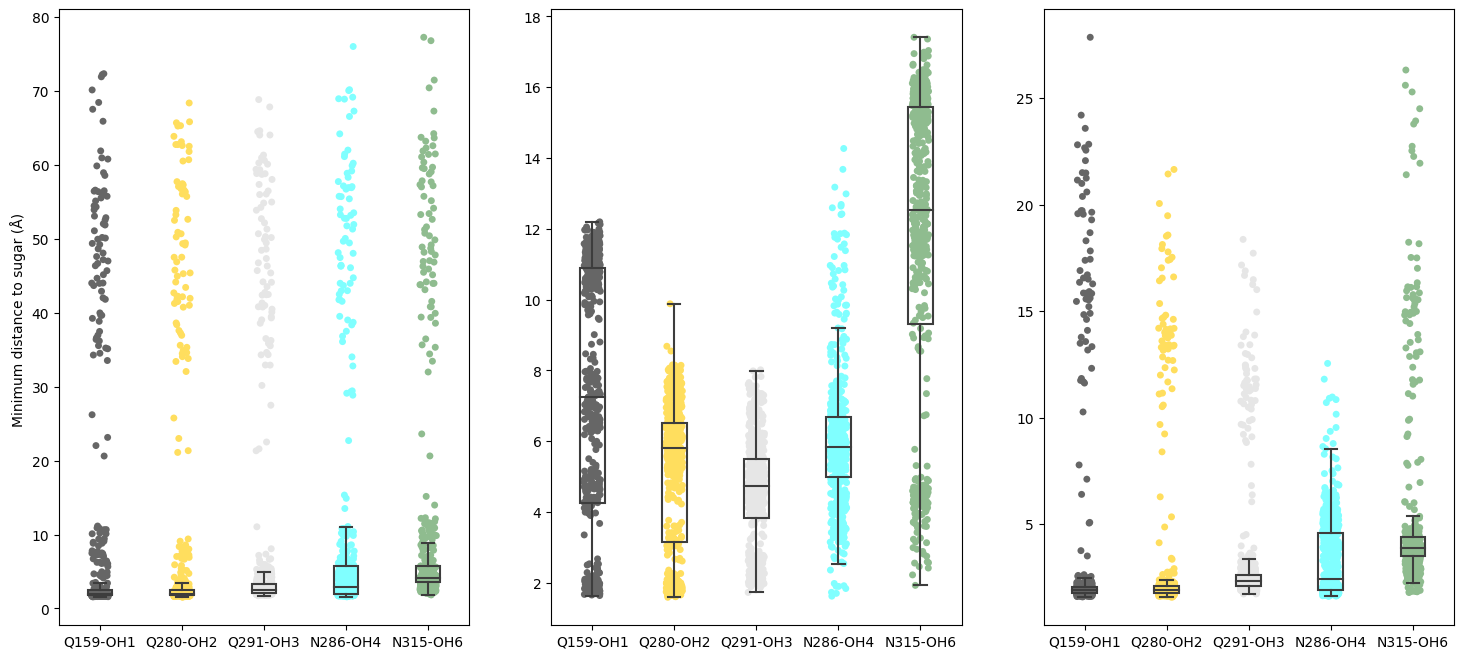

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
axs = axs.ravel()

k=0
for i in range(1,4):
    u = mda.Universe(dirgro+protname+str(i)+".start.gro",\
                    dirtraj+protname+str(i)+".skip250.xtc")
    k+=1
    dists_d = {}
    for res in res_l:
        binding_res = u.select_atoms(f'resid {res}')
        bfru = u.select_atoms(f'resname BGLC {bfru_sel[res]}')
        dists = []
        for ts in u.trajectory[:N]:
            temp = np.min(d.distance_array(binding_res.positions, bfru.positions))
            dists.append(temp)
        dists_d[title_d[res]] = np.array(dists)
    df = pd.DataFrame(dists_d)
    sns.stripplot(data=df, dodge=False, ax=axs[k-1], palette = color_l)
    sns.boxplot(data = df, saturation=1, showfliers=False,
               width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=axs[k-1], zorder =3)

    axs[0].set_ylabel('Minimum distance to sugar (Å) ')